In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [42]:
X = np.random.randn(100)
MU = (math.e**0.5) / (2 * math.pi) ** 0.5
SIGMA = ((math.e**2) / (2 * math.pi) ** 0.5) - MU**2
MU, SIGMA

(0.657744623479457, 2.5151789004053753)

In [7]:
Y = np.exp(X)
Y

array([ 0.63566112,  2.53685695,  2.50721369,  1.50530269,  0.90841491,
        3.84471607,  0.52320383,  4.22176075,  1.97130488,  1.55415757,
        0.17651001,  3.6306205 ,  8.79824954,  1.12514464,  1.59925842,
        8.74619138,  0.7231139 ,  2.89269734,  1.09717793,  0.48763745,
        0.52857687,  2.84685485,  0.80573561,  0.43440697,  1.26153614,
        0.78814324,  0.20610933,  9.80464662,  0.31896042,  1.3123284 ,
        0.31343611,  1.0509654 ,  1.08182295,  0.34858965,  3.4511353 ,
       15.46454439,  0.33298807,  0.31334177,  0.69727099,  1.75624501,
        0.25356864,  4.42737671,  1.28341945,  0.62153368,  2.8522181 ,
        4.18552854,  0.80744322,  0.06703965,  3.01322059,  1.66194247,
        1.72630779,  0.64250671,  0.39399539,  1.45490255,  0.4151138 ,
        2.06134153,  0.40406245,  0.55476698,  7.000561  ,  1.43776677,
        1.23363998,  0.21641115,  1.34885199,  1.1077945 ,  3.82536396,
        0.59622248,  3.35706529,  3.14506521,  2.26733029,  3.52

In [25]:
def subsample(inputs: np.array, n_samples: int, repeations: bool):
    return np.random.choice(inputs, n_samples, repeations)


def plot_hist(samples):
    plt.hist(samples, density=True)

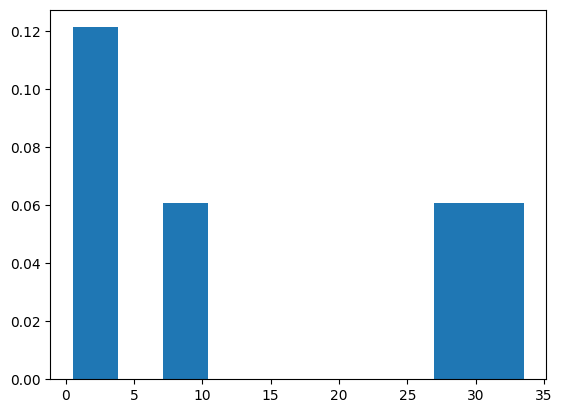

In [ ]:
As = []

for i in range(5):
    samples = subsample(Y, 30, False)
    mean = MU
    std = SIGMA**0.5
    skewness = np.mean(((samples - mean) / std) ** 3)
    As.append(skewness)

plot_hist(As)

In [79]:
Bs = []

N = 70
samples = subsample(Y, N, True)
mean = MU
std = SIGMA**0.5
skewness = np.mean(((samples - MU) / std) ** 3)
Bs.append(skewness)

base = (skewness - MU) / ((SIGMA**0.5) / (N**0.5))
left, right = skewness - 1.96 * (SIGMA**0.5) / (N**0.5), skewness + 1.96 * (SIGMA**0.5) / (N**0.5)

left, right

(np.float64(25.852643348533984), np.float64(26.595699249672645))

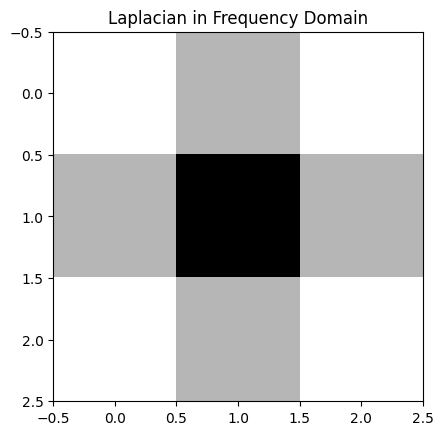

In [1]:
import numpy as np
from matplotlib import pyplot as plt

laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
fft_laplacian = np.fft.fftshift(np.fft.fft2(laplacian))
plt.imshow(np.log(np.abs(fft_laplacian) + 1), cmap="gray")
plt.title("Laplacian in Frequency Domain")
plt.show()

In [ ]:
def patch_embedding_forward(image: "np.ndarray", patch_size: int) -> "np.ndarray":
    """
    Extract and flatten non-overlapping patches from an image.

    Args:
        image: Input image of shape (H, W, C)
        patch_size: Size of each square patch

    Returns:
        Flattened patches of shape (num_patches, patch_dim)
    """
    # H, W, C -> N, P^2 * C
    H, W, C = image.shape
    N = (H // patch_size) * (W // patch_size)
    h_offsets = np.arange(0, W, patch_size)
    v_offsets = np.arange(0, H, patch_size)
    x, y = np.meshgrid(h_offsets, v_offsets, indexing="ij")
    patches = image[y : y + patch_size, x : x + patch_size, :]  # N, P, P, C
    assert patches.shape == (N, patch_size, patch_size, C)
    return patches.reshape(N, -1)